In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
cricket=pd.read_csv('C:\\Users\\WIN\\Desktop\\Data Science labs\\Mini Project 3\\Data\\ODI_Match_Results.csv')
print(cricket)

      Unnamed: 0 Result     Margin   BR  Toss  Team Won  Toss Won  Bat  \
0            418    won    85 runs  NaN  lost         1         0  1st   
1            692   lost    85 runs  NaN   won         0         1  2nd   
2            419   lost    10 runs  NaN  lost         0         0  2nd   
3            693    won    10 runs  NaN   won         1         1  1st   
4            121   lost   107 runs  NaN  lost         0         0  2nd   
...          ...    ...        ...  ...   ...       ...       ...  ...   
1317         997    won  3 wickets  3.0   won         1         1  2nd   
1318         282   aban          -  NaN     -         1         1    -   
1319        1322      -          -  NaN   won         1         1  2nd   
1320         559      -          -  NaN  lost         1         0  2nd   
1321         998      -          -  NaN   won         1         1  1st   

       Opposition      Ground Start Date     Match_ID      Country  Country_ID  
0         v India     Kolkata 

In [3]:
cricket.shape

(1322, 14)

In [4]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1322 entries, 0 to 1321
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1322 non-null   int64  
 1   Result      1322 non-null   object 
 2   Margin      1322 non-null   object 
 3   BR          606 non-null    float64
 4   Toss        1322 non-null   object 
 5   Team Won    1322 non-null   int64  
 6   Toss Won    1322 non-null   int64  
 7   Bat         1322 non-null   object 
 8   Opposition  1322 non-null   object 
 9   Ground      1322 non-null   object 
 10  Start Date  1322 non-null   object 
 11  Match_ID    1322 non-null   object 
 12  Country     1322 non-null   object 
 13  Country_ID  1322 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 144.7+ KB


In [5]:
cricket.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Team Won        0
Toss Won        0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [6]:
cricket.dtypes

Unnamed: 0      int64
Result         object
Margin         object
BR            float64
Toss           object
Team Won        int64
Toss Won        int64
Bat            object
Opposition     object
Ground         object
Start Date     object
Match_ID       object
Country        object
Country_ID      int64
dtype: object

In [7]:
cricket.isnull().sum()

Unnamed: 0      0
Result          0
Margin          0
BR            716
Toss            0
Team Won        0
Toss Won        0
Bat             0
Opposition      0
Ground          0
Start Date      0
Match_ID        0
Country         0
Country_ID      0
dtype: int64

In [8]:
cricket1 = cricket[['Team Won','Country']]
cricket1.head()

,Team Won,Country
0,1,Pakistan
1,0,India
2,0,Pakistan
3,1,India
4,0,SriLanka


In [9]:
cricket1_group = cricket.groupby('Country')
cricket1_group.size()

Country
Afghanistan     92
Australia      135
Bangladesh      97
England        147
India          160
Newzealad      132
Pakistan       142
SouthAfrica    135
SriLanka       162
WestIndies     120
dtype: int64

In [10]:
win_totals = cricket1_group.sum()
win_totals.sort_values(by='Team Won').head()

,Unnamed: 0,BR,Team Won,Toss Won,Country_ID
Country,,,,,
WestIndies,7260,2715.0,51,62,480
Afghanistan,117438,2193.0,53,46,3680
Bangladesh,101559,2054.0,54,48,2425
Pakistan,69367,2749.0,70,66,994
SriLanka,32643,4463.0,75,87,1296


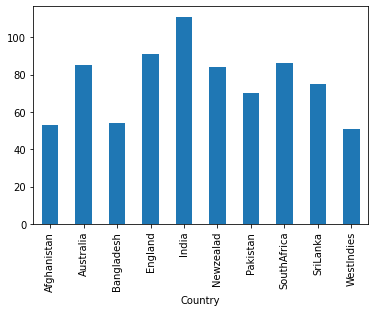

In [11]:
my_plot = win_totals['Team Won'].plot(kind='bar')

In [17]:
# ANSWER
feature_cols = ['Toss Won']
X = cricket[feature_cols]
Y = cricket['Team Won']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [19]:
logreg = LogisticRegression()

In [20]:
# ANSWER
logreg.fit(X_train, Y_train)

LogisticRegression()

In [21]:
# ANSWER
logreg.fit(X_test, Y_test)

LogisticRegression()

In [22]:
logreg.coef_

array([[0.1495286]])

In [23]:
logreg.intercept_

array([0.02045836])

In [28]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5799


In [29]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5547


In [30]:
def get_logreg_score(cricket, feature_cols, target_col):
    X = cricket[feature_cols]
    y = cricket[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [31]:
# ANSWER 
target_col = 'Team Won'
feature_cols = ['Toss Won']
get_logreg_score(cricket, feature_cols, target_col)

0.56797583081571

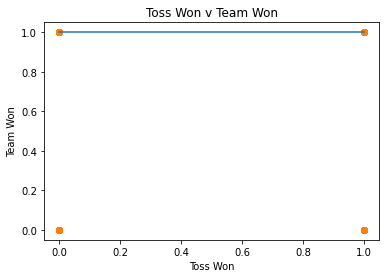

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X, Y)
plt.scatter(X, Y)
Xfit = np.linspace(0, 1, 50)
Yfit = logreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Toss Won')
plt.ylabel('Team Won')
plt.title ('Toss Won v Team Won')
plt.plot(Xfit, Yfit, label = 'Toss Won v Team Won');

[[-0.11376819]] [0.35928742]

[[0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.41113207 0.58886793]
 [0.43892667 0.56107333]
 [0.43892667 0.56107

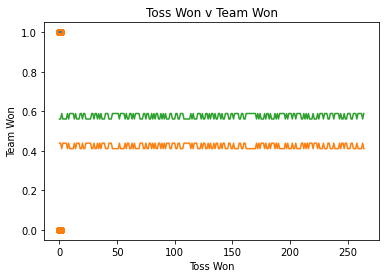

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True)
logreg.fit(X, Y)
plt.scatter(X, Y)
Xfit = np.linspace(0, 1, 50)
Yfit = logreg.predict(Xfit[:, np.newaxis])
plt.scatter(X, Y)
plt.xlabel('Toss Won')
plt.ylabel('Team Won')
plt.title ('Toss Won v Team Won')
plt.plot(Xfit, Yfit, label = 'Toss Won v Team Won');
print(logreg.coef_, logreg.intercept_)
print()
print(logreg.predict_proba(X_test))
plt.plot(logreg.predict_proba(X_test))

In [34]:
#Imputation of attendance as it is the oly variable with missing values.
cricket['BR'].fillna(cricket.BR.mean(), inplace=True)
feature_cols = ['Toss Won', 'BR']
X = cricket[feature_cols]

In [35]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5799


In [36]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class))

[[  0 118]
 [  0 147]]


In [37]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


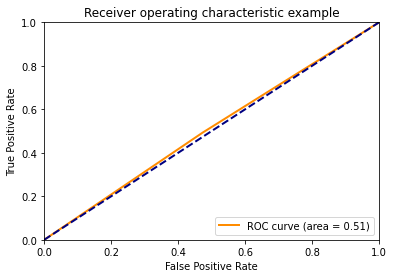

In [38]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

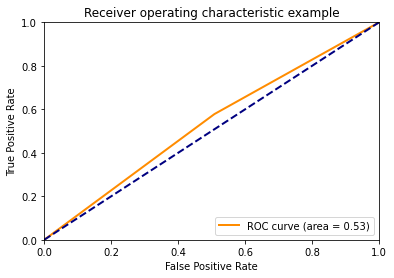

In [39]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [40]:
#Imputation of BR as it is the only variable with missing values.
cricket['BR'].fillna(cricket.BR.mean(), inplace=True)
feature_cols = ['Toss Won', 'BR']
X = cricket[feature_cols]

In [41]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5799


In [42]:
def get_logreg_score(cricket, feature_cols, target_col):
    X = cricket[feature_cols]
    y = cricket[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [43]:
# ANSWER 
target_col = 'Team Won'
feature_cols = ['Toss Won']
get_logreg_score(cricket, feature_cols, target_col)

0.56797583081571

In [44]:
# ANSWER 
target_col = 'Team Won'
feature_cols = ['Toss Won', 'BR']
get_logreg_score(cricket, feature_cols, target_col)

0.56797583081571

In [45]:
# ANSWER
y_pred_class = logreg.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_pred_class))

[[  0 118]
 [  0 147]]


In [46]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


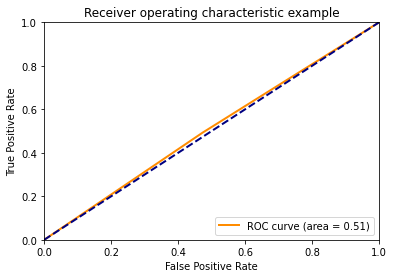

In [47]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

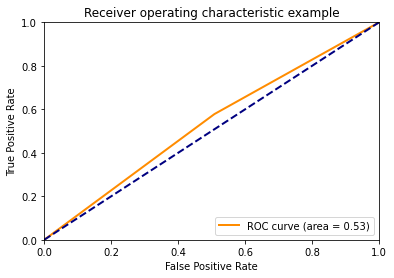

In [48]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(Y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [49]:
def get_logreg_score(cricket, feature_cols, target_col):
    X = cricket[feature_cols]
    y = cricket[target_col]

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

    # Build Model
    logreg = LogisticRegression()

    # Fit
    logreg.fit(X_train, y_train)

    # Score
    logreg_score = logreg.score(X_test, y_test)

    # Return accuracy rate
    return logreg_score

In [50]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_train, Y_train)
# Score
logreg_score = logreg.score(X_train, Y_train)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5799


In [51]:
# Build Model
logreg = LogisticRegression()
# Fit Model
logreg.fit(X_test, Y_test)
# Score
logreg_score = logreg.score(X_test, Y_test)
print('accuracy = {:1.4f}'.format(logreg_score))

accuracy = 0.5547


In [52]:
# ANSWER 
target_col = 'Team Won'
feature_cols = ['Toss Won','BR']
get_logreg_score(cricket, feature_cols, target_col)

0.56797583081571

In [53]:
cricket["Result"] = cricket["Result"].astype('category')
cricket.dtypes
cricket["Result_coded"] = cricket["Result"].cat.codes
cricket.head()
cricket["Margin"] = cricket["Margin"].astype('category')
cricket.dtypes
cricket["Margin_coded"] = cricket["Margin"].cat.codes
cricket.head()
cricket["Bat"] = cricket["Bat"].astype('category')
cricket.dtypes
cricket["Bat_coded"] = cricket["Bat"].cat.codes
cricket.head()
cricket["Opposition"] = cricket["Opposition"].astype('category')
cricket.dtypes
cricket["Opposition_coded"] = cricket["Opposition"].cat.codes
cricket.head()
cricket["Ground"] = cricket["Ground"].astype('category')
cricket.dtypes
cricket["Ground_coded"] = cricket["Ground"].cat.codes
cricket.head()          
cricket["Match_ID"] = cricket["Match_ID"].astype('category')
cricket.dtypes
cricket["Match_ID_coded"] = cricket["Match_ID"].cat.codes
cricket.head()     
cricket["Start Date"] = cricket["Start Date"].astype('category')
cricket.dtypes
cricket["Start Date_coded"] = cricket["Start Date"].cat.codes
cricket.head()     
cricket["Country"] = cricket["Country"].astype('category')
cricket.dtypes
cricket["Country_coded"] = cricket["Country"].cat.codes
cricket.head()      

,Unnamed: 0,Result,Margin,BR,Toss,Team Won,Toss Won,Bat,Opposition,Ground,...,Country,Country_ID,Result_coded,Margin_coded,Bat_coded,Opposition_coded,Ground_coded,Match_ID_coded,Start Date_coded,Country_coded
0,418,won,85 runs,51.409241,lost,1,0,1st,v India,Kolkata,...,Pakistan,7,6,160,1,5,57,0,480,6
1,692,lost,85 runs,51.409241,won,0,1,2nd,v Pakistan,Kolkata,...,India,6,3,160,2,11,57,0,480,4
2,419,lost,10 runs,51.409241,lost,0,0,2nd,v India,Delhi,...,Pakistan,7,3,3,2,5,29,1,569,6
3,693,won,10 runs,51.409241,won,1,1,1st,v Pakistan,Delhi,...,India,6,6,3,1,11,29,1,569,4
4,121,lost,107 runs,51.409241,lost,0,0,2nd,v Australia,Melbourne,...,SriLanka,8,3,10,2,1,63,2,45,8


In [54]:
cricket.drop(['Result','Margin', 'Bat', 'Opposition', 'Ground', 'Match_ID', 'Start Date', 'Country'], axis=1, inplace=True)

In [55]:
cricket.head()

,Unnamed: 0,BR,Toss,Team Won,Toss Won,Country_ID,Result_coded,Margin_coded,Bat_coded,Opposition_coded,Ground_coded,Match_ID_coded,Start Date_coded,Country_coded
0,418,51.409241,lost,1,0,7,6,160,1,5,57,0,480,6
1,692,51.409241,won,0,1,6,3,160,2,11,57,0,480,4
2,419,51.409241,lost,0,0,7,3,3,2,5,29,1,569,6
3,693,51.409241,won,1,1,6,6,3,1,11,29,1,569,4
4,121,51.409241,lost,0,0,8,3,10,2,1,63,2,45,8


In [56]:
y = cricket['Team Won']

In [57]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1317    1
1318    1
1319    1
1320    1
1321    1
Name: Team Won, Length: 1322, dtype: int64

In [58]:
x = cricket.drop(['Unnamed: 0', 'Toss'],axis=1)

In [59]:
x.head()

,BR,Team Won,Toss Won,Country_ID,Result_coded,Margin_coded,Bat_coded,Opposition_coded,Ground_coded,Match_ID_coded,Start Date_coded,Country_coded
0,51.409241,1,0,7,6,160,1,5,57,0,480,6
1,51.409241,0,1,6,3,160,2,11,57,0,480,4
2,51.409241,0,0,7,3,3,2,5,29,1,569,6
3,51.409241,1,1,6,6,3,1,11,29,1,569,4
4,51.409241,0,0,8,3,10,2,1,63,2,45,8


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
oversample = SMOTE()

In [64]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [65]:
np.bincount(y)

array([562, 760], dtype=int64)

In [66]:
logreg = LogisticRegression(multi_class='ovr',max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [67]:
#logreg.coef_
y_pred = logreg.predict(X_test)

In [68]:
print('accuracy = {:7.4f}'.format(logreg.score(X_train, y_train)))

accuracy =  0.9991


In [69]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[143   0]
 [  0 188]]


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1','Class 2']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00       143
     Class 2       1.00      1.00      1.00       188

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [71]:
from sklearn.svm import SVC
model = SVC(decision_function_shape='ovo',probability=True)
# fit model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [72]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[109  34]
 [136  52]]


In [73]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.52
Macro Recall: 0.52
Macro F1-score: 0.47

Weighted Precision: 0.54
Weighted Recall: 0.49
Weighted F1-score: 0.46

Classification Report

              precision    recall  f1-score   support

     Class 1       0.44      0.76      0.56       143
     Class 2       0.60      0.28      0.38       188

    accuracy                           0.49       331
   macro avg       0.52      0.52      0.47       331
weighted avg       0.54      0.49      0.46       331



In [74]:
# preds.shape
# model.predict_proba(X_train).shape
y_train.shape

(1144,)

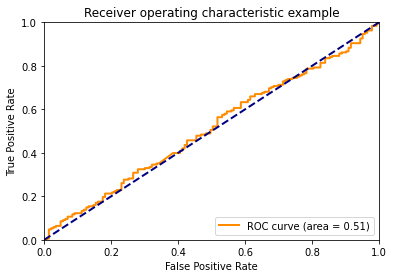

In [75]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

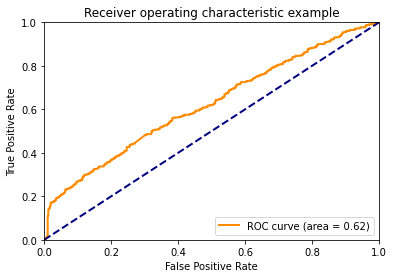

In [76]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [77]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1]


In [78]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[109  34]
 [136  52]]


In [79]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 0.49

Micro Precision: 0.49
Micro Recall: 0.49
Micro F1-score: 0.49

Macro Precision: 0.52
Macro Recall: 0.52
Macro F1-score: 0.47

Weighted Precision: 0.54
Weighted Recall: 0.49
Weighted F1-score: 0.46

Classification Report

              precision    recall  f1-score   support

     Class 1       0.44      0.76      0.56       143
     Class 2       0.60      0.28      0.38       188

    accuracy                           0.49       331
   macro avg       0.52      0.52      0.47       331
weighted avg       0.54      0.49      0.46       331



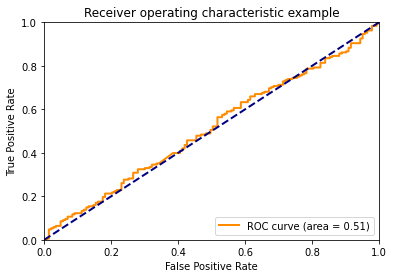

In [80]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

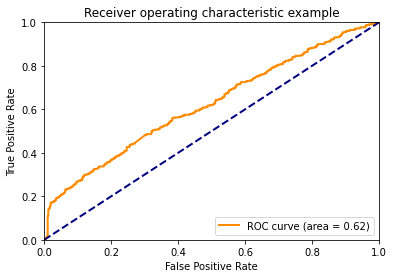

In [81]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Accuracy is:  0.5740181268882175
              precision    recall  f1-score   support

           0       0.51      0.56      0.53       143
           1       0.64      0.59      0.61       188

    accuracy                           0.57       331
   macro avg       0.57      0.57      0.57       331
weighted avg       0.58      0.57      0.58       331



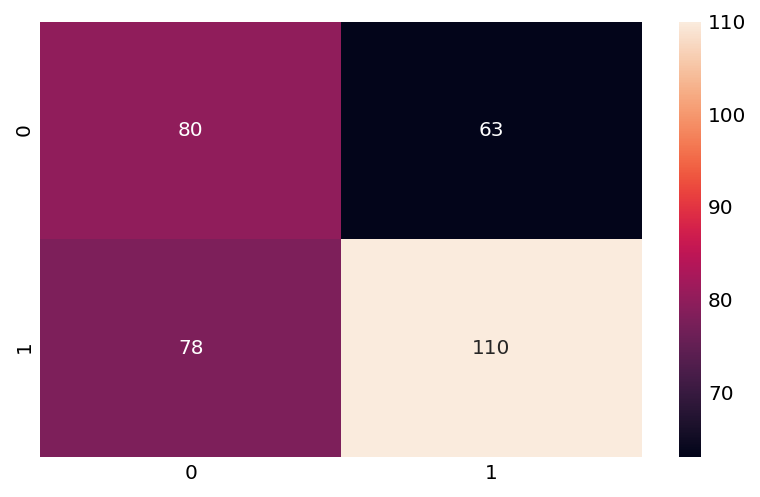

In [83]:
target_col = 'Team Won'
feature_cols = ['Toss Won', 'Margin_coded', 'Bat_coded', 'BR']
X = cricket[feature_cols]
y = cricket[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train, y_train)

#Predict Score 
y_pred = model.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

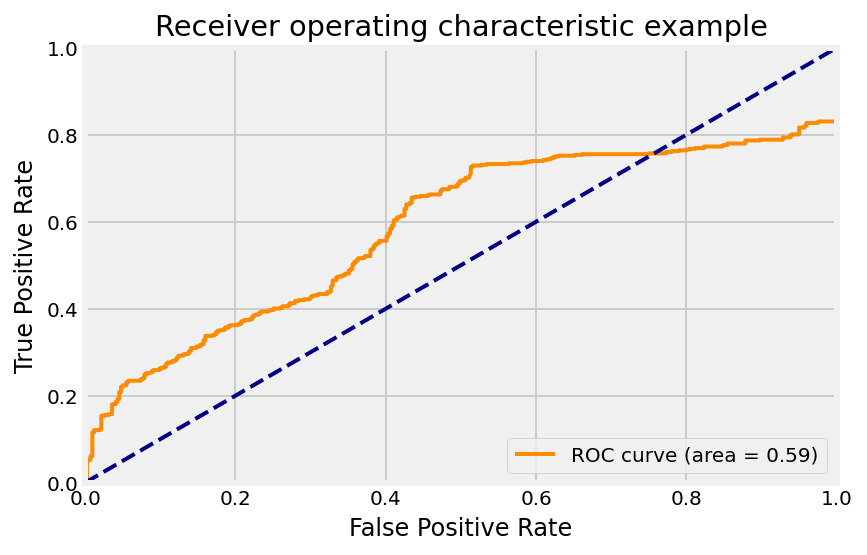

In [84]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

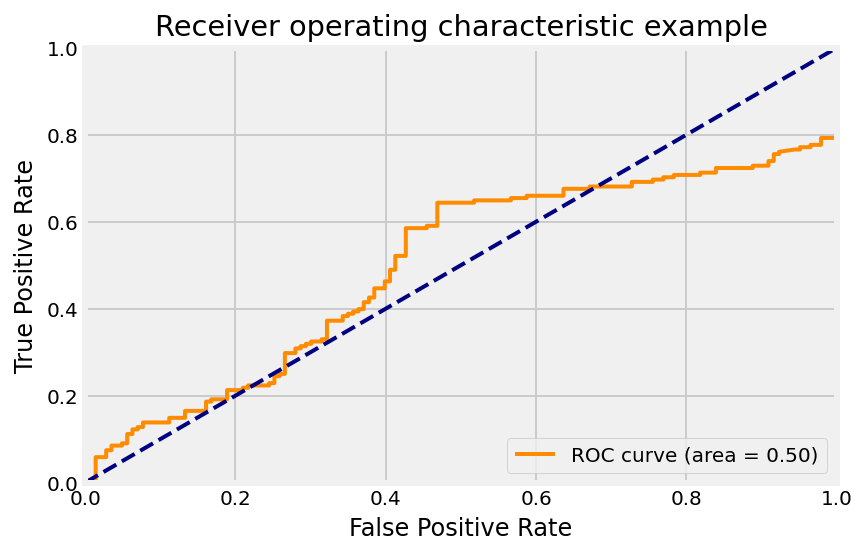

In [85]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = model.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [86]:
y = cricket['Team Won']

In [87]:
y

0       1
1       0
2       0
3       1
4       0
       ..
1317    1
1318    1
1319    1
1320    1
1321    1
Name: Team Won, Length: 1322, dtype: int64

In [88]:
x = cricket.drop(['Unnamed: 0', 'Toss'],axis=1)

In [89]:
x.head()

,BR,Team Won,Toss Won,Country_ID,Result_coded,Margin_coded,Bat_coded,Opposition_coded,Ground_coded,Match_ID_coded,Start Date_coded,Country_coded
0,51.409241,1,0,7,6,160,1,5,57,0,480,6
1,51.409241,0,1,6,3,160,2,11,57,0,480,4
2,51.409241,0,0,7,3,3,2,5,29,1,569,6
3,51.409241,1,1,6,6,3,1,11,29,1,569,4
4,51.409241,0,0,8,3,10,2,1,63,2,45,8


In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
oversample = SMOTE()

In [93]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [94]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


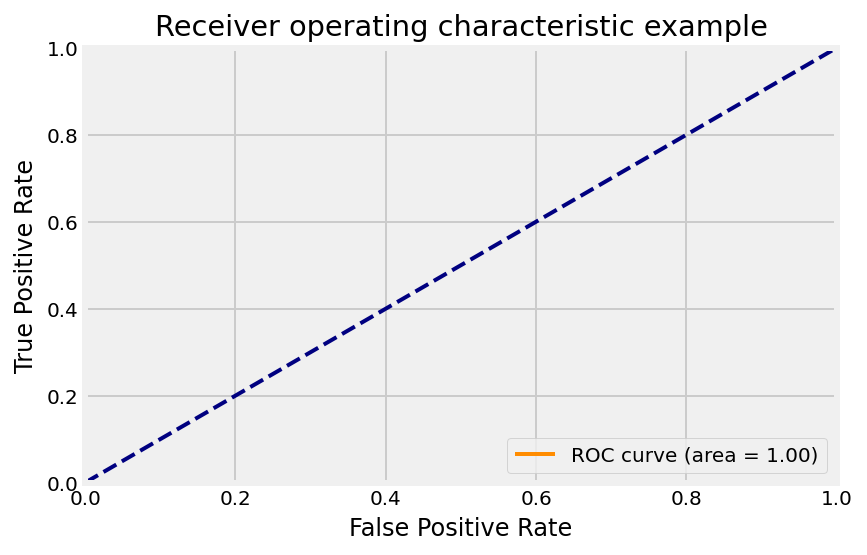

In [97]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

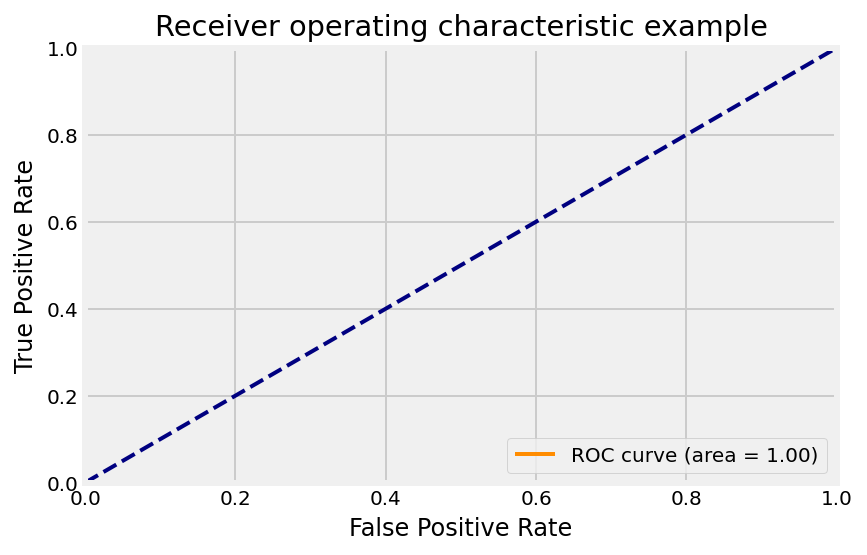

In [98]:
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = clf.predict_proba(X_train)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_train, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [99]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2']))


Accuracy: 1.00

Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00

Classification Report

              precision    recall  f1-score   support

     Class 1       1.00      1.00      1.00       143
     Class 2       1.00      1.00      1.00       188

    accuracy                           1.00       331
   macro avg       1.00      1.00      1.00       331
weighted avg       1.00      1.00      1.00       331



In [100]:
# Import libraries
## Import Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')

In [101]:
import pandas as pd
import numpy as np

In [136]:
target_col = 'Team Won'
feature_cols = ['Toss Won', 'Margin_coded', 'Bat_coded', 'BR']
X = cricket[feature_cols]
y = cricket[target_col]
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [137]:
# Choose Decision Tree Classifier Model
model = DecisionTreeClassifier()
print(model)

DecisionTreeClassifier()


In [138]:
# Fit model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [139]:
# Evaluate model against training set
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [140]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


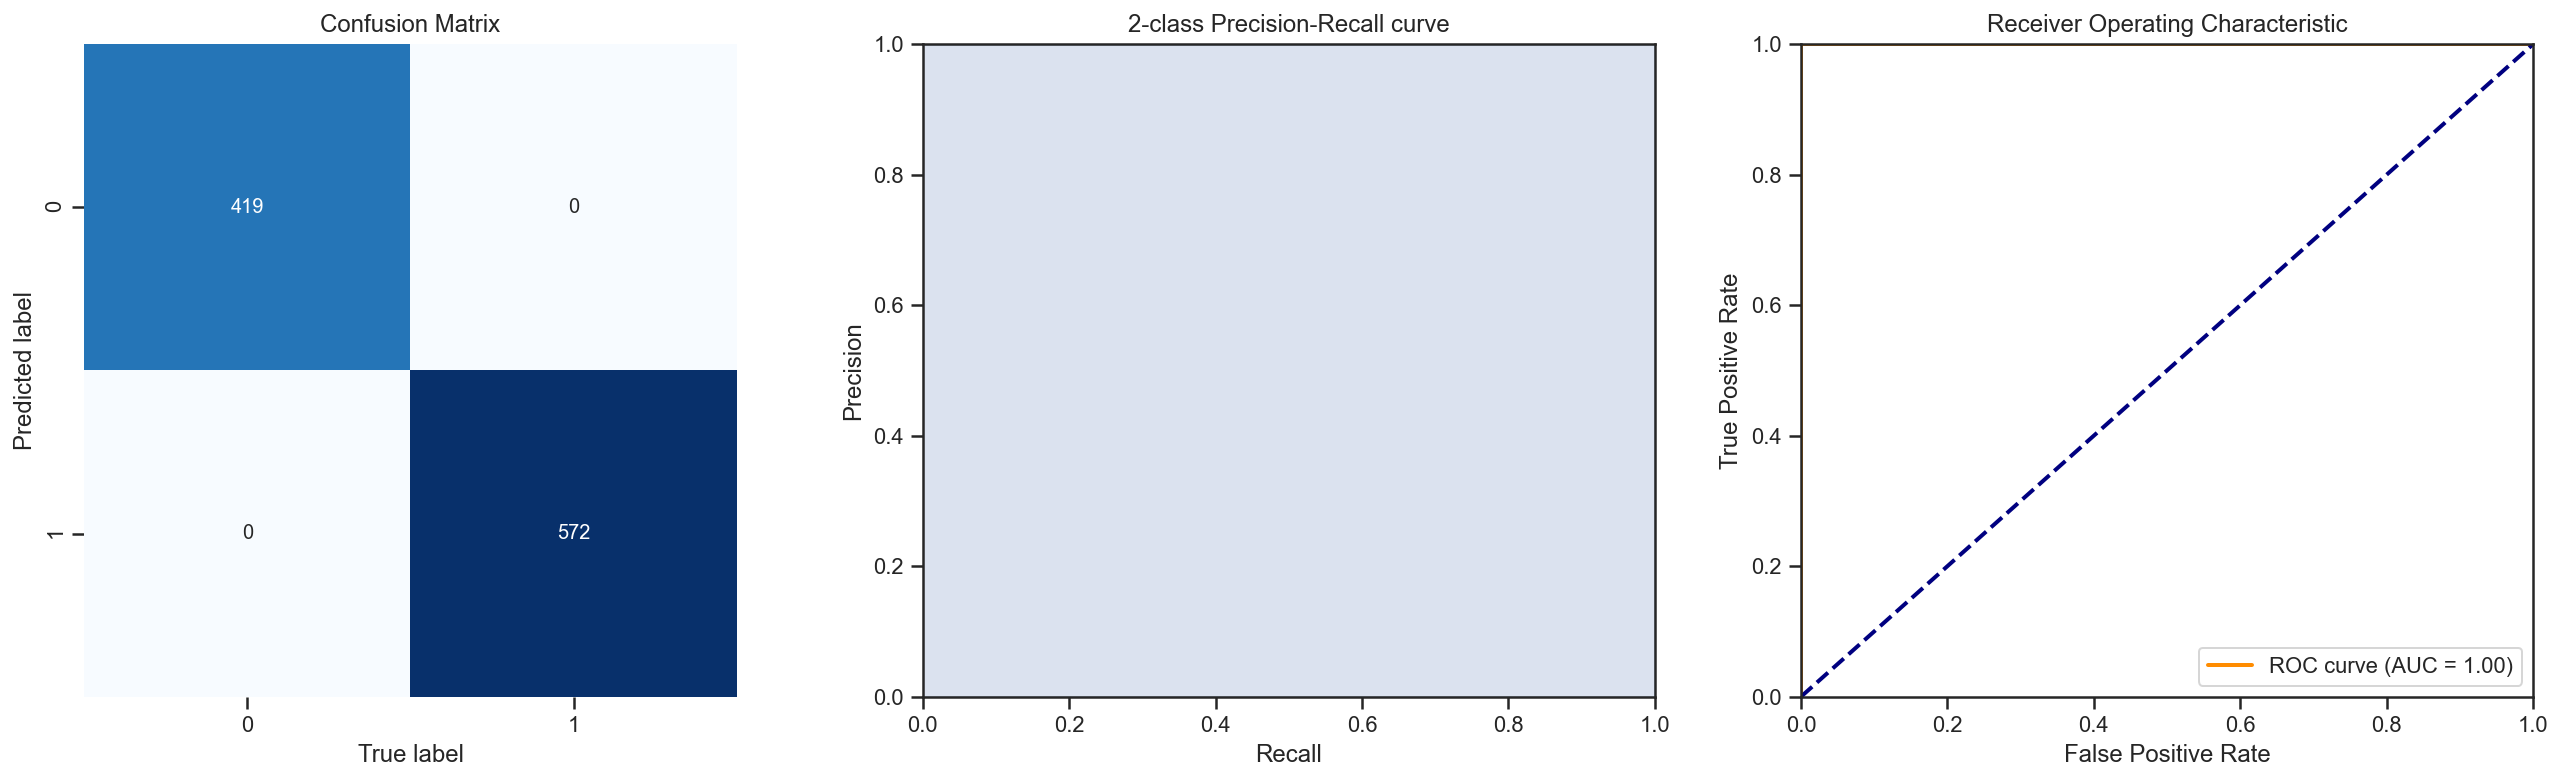

In [141]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [142]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


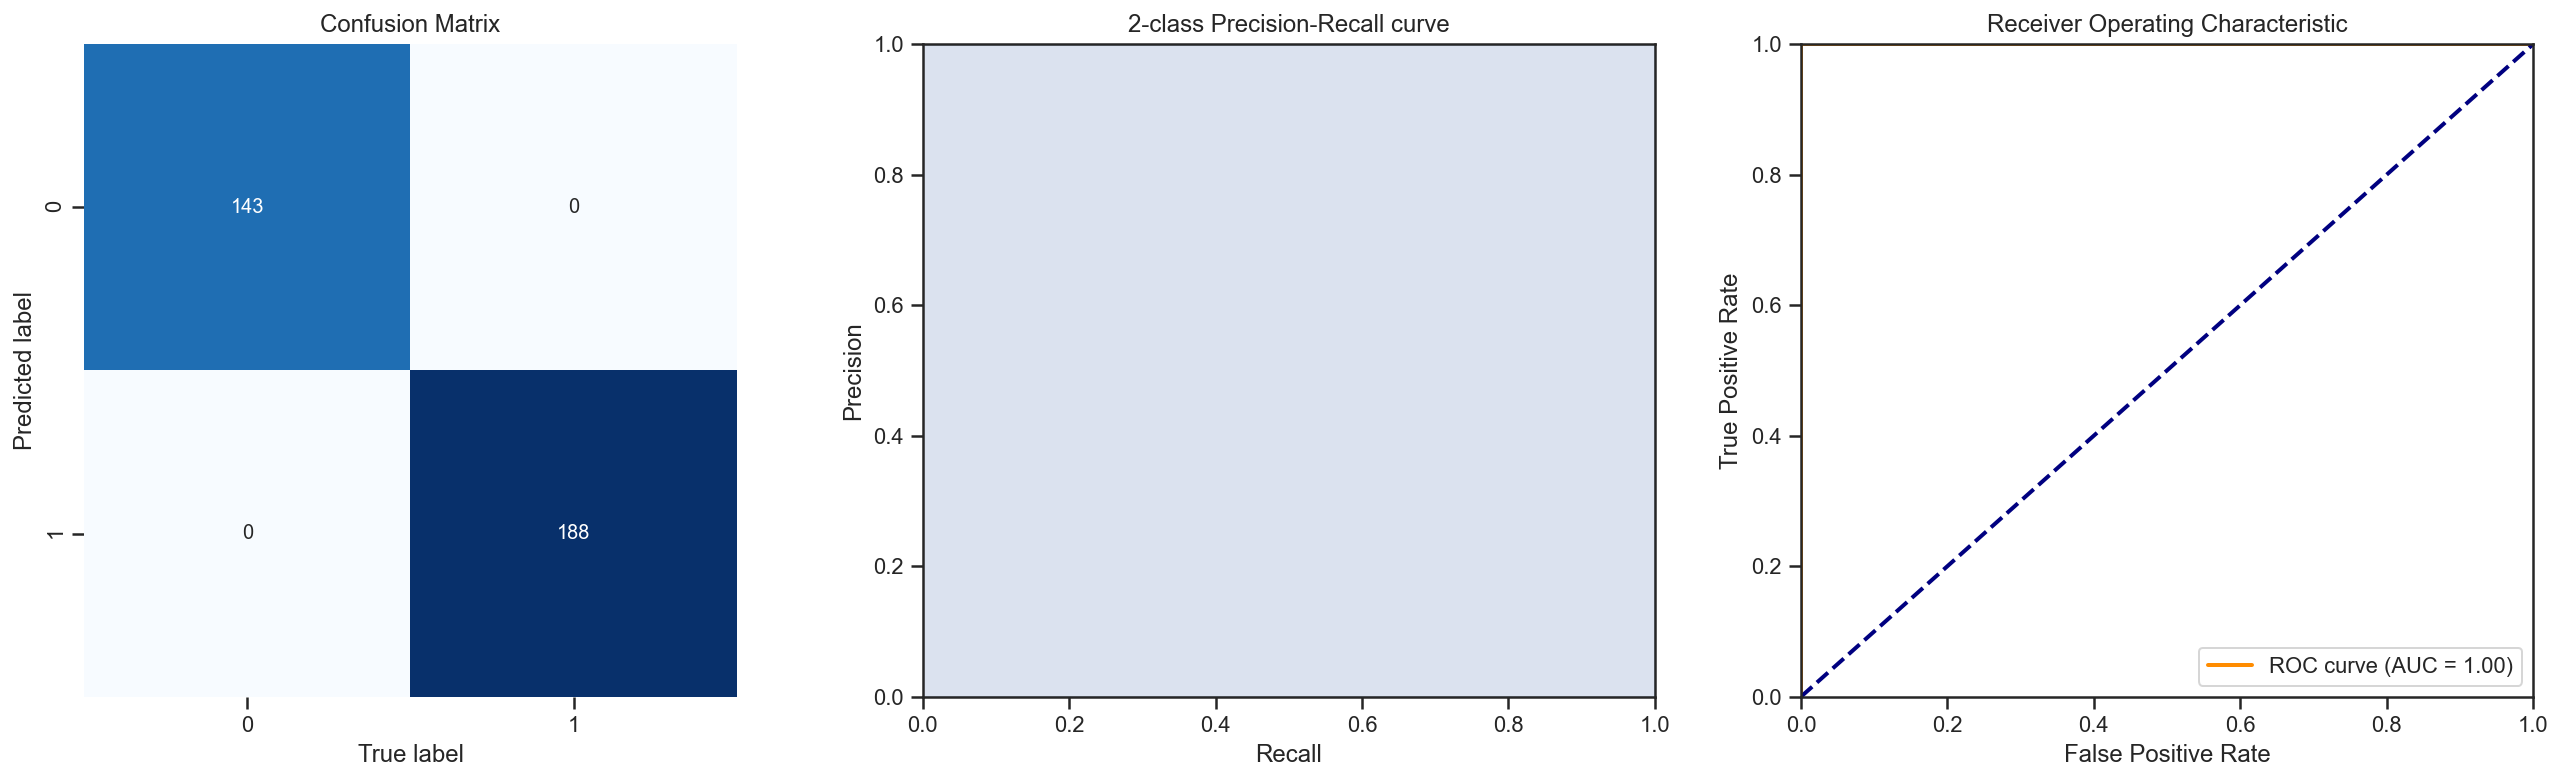

In [143]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [144]:
# Import libraries
## Import Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import seaborn as sns
sns.set(style = 'ticks')

In [145]:
# Choose Random forest model
model = RandomForestClassifier()
print(model)

RandomForestClassifier()


In [146]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier()

In [147]:
# Evaluate model against training set
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [148]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


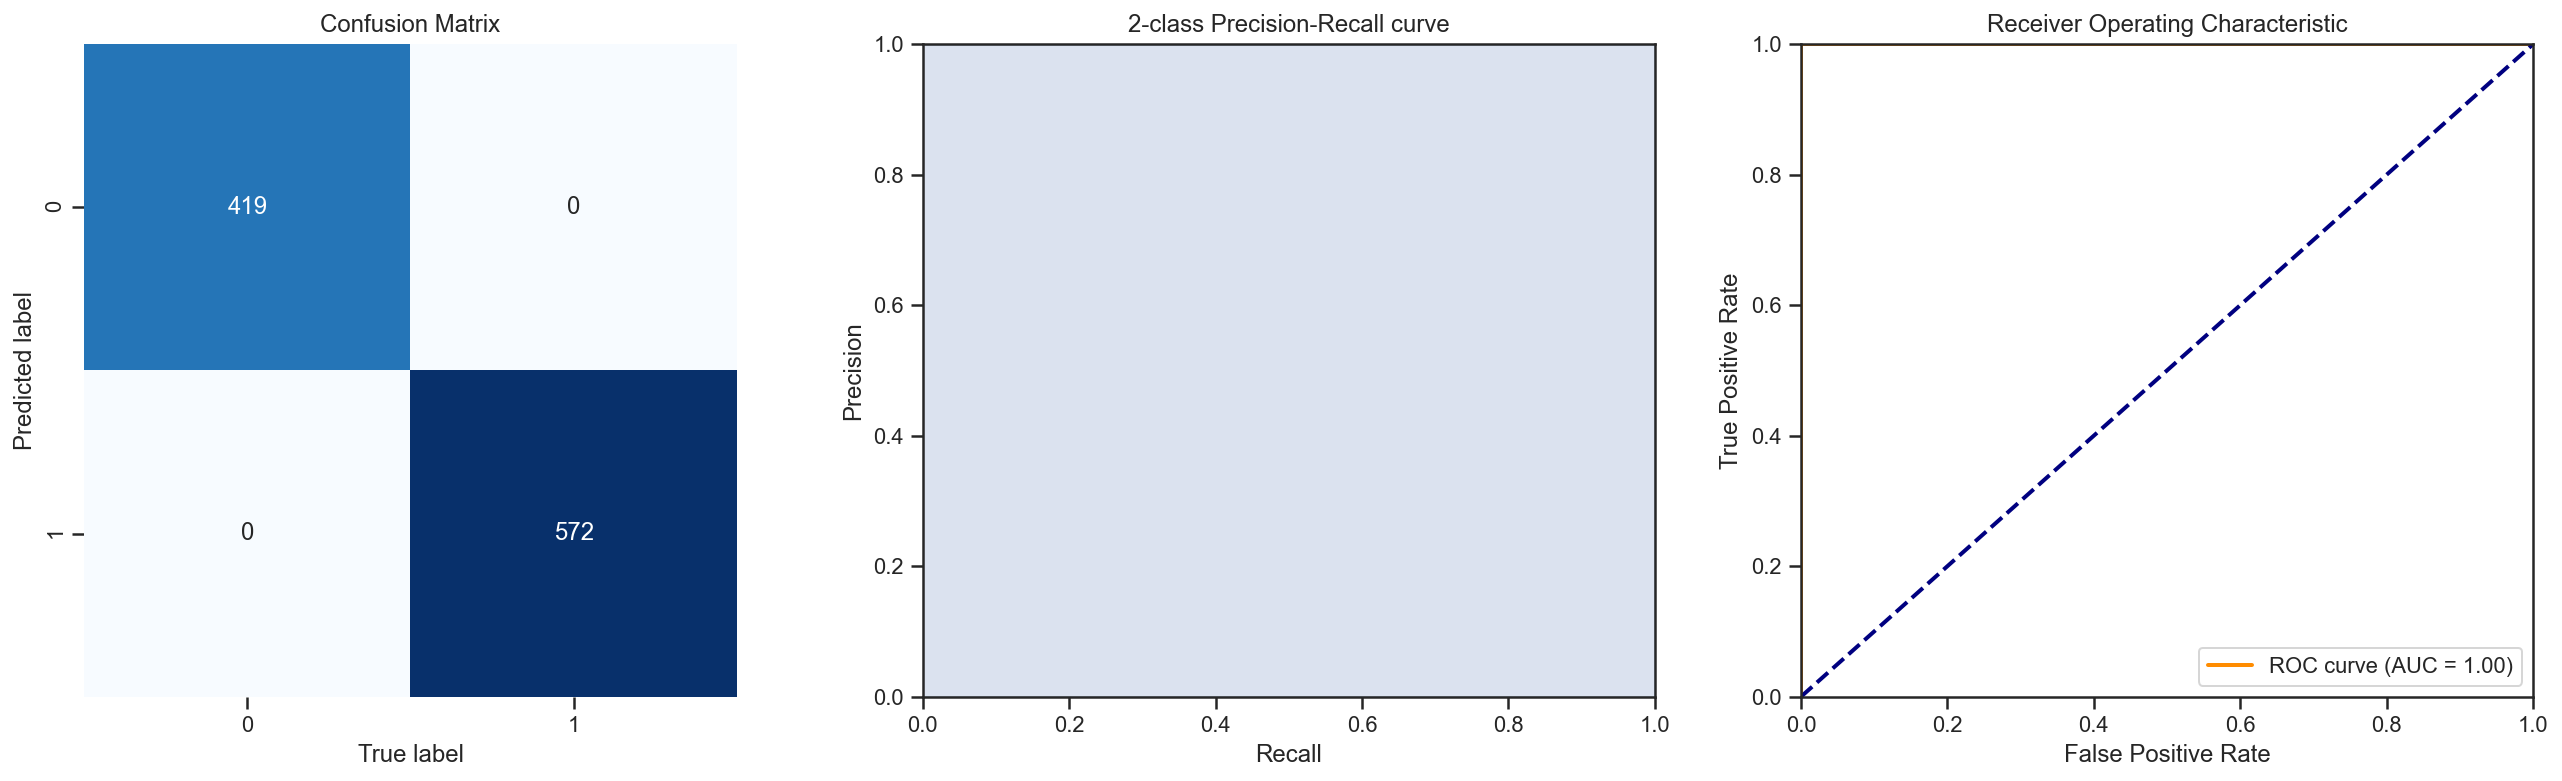

In [149]:
show_summary_report(y_train, y_train_pred, y_train_prob)

In [150]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)

Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


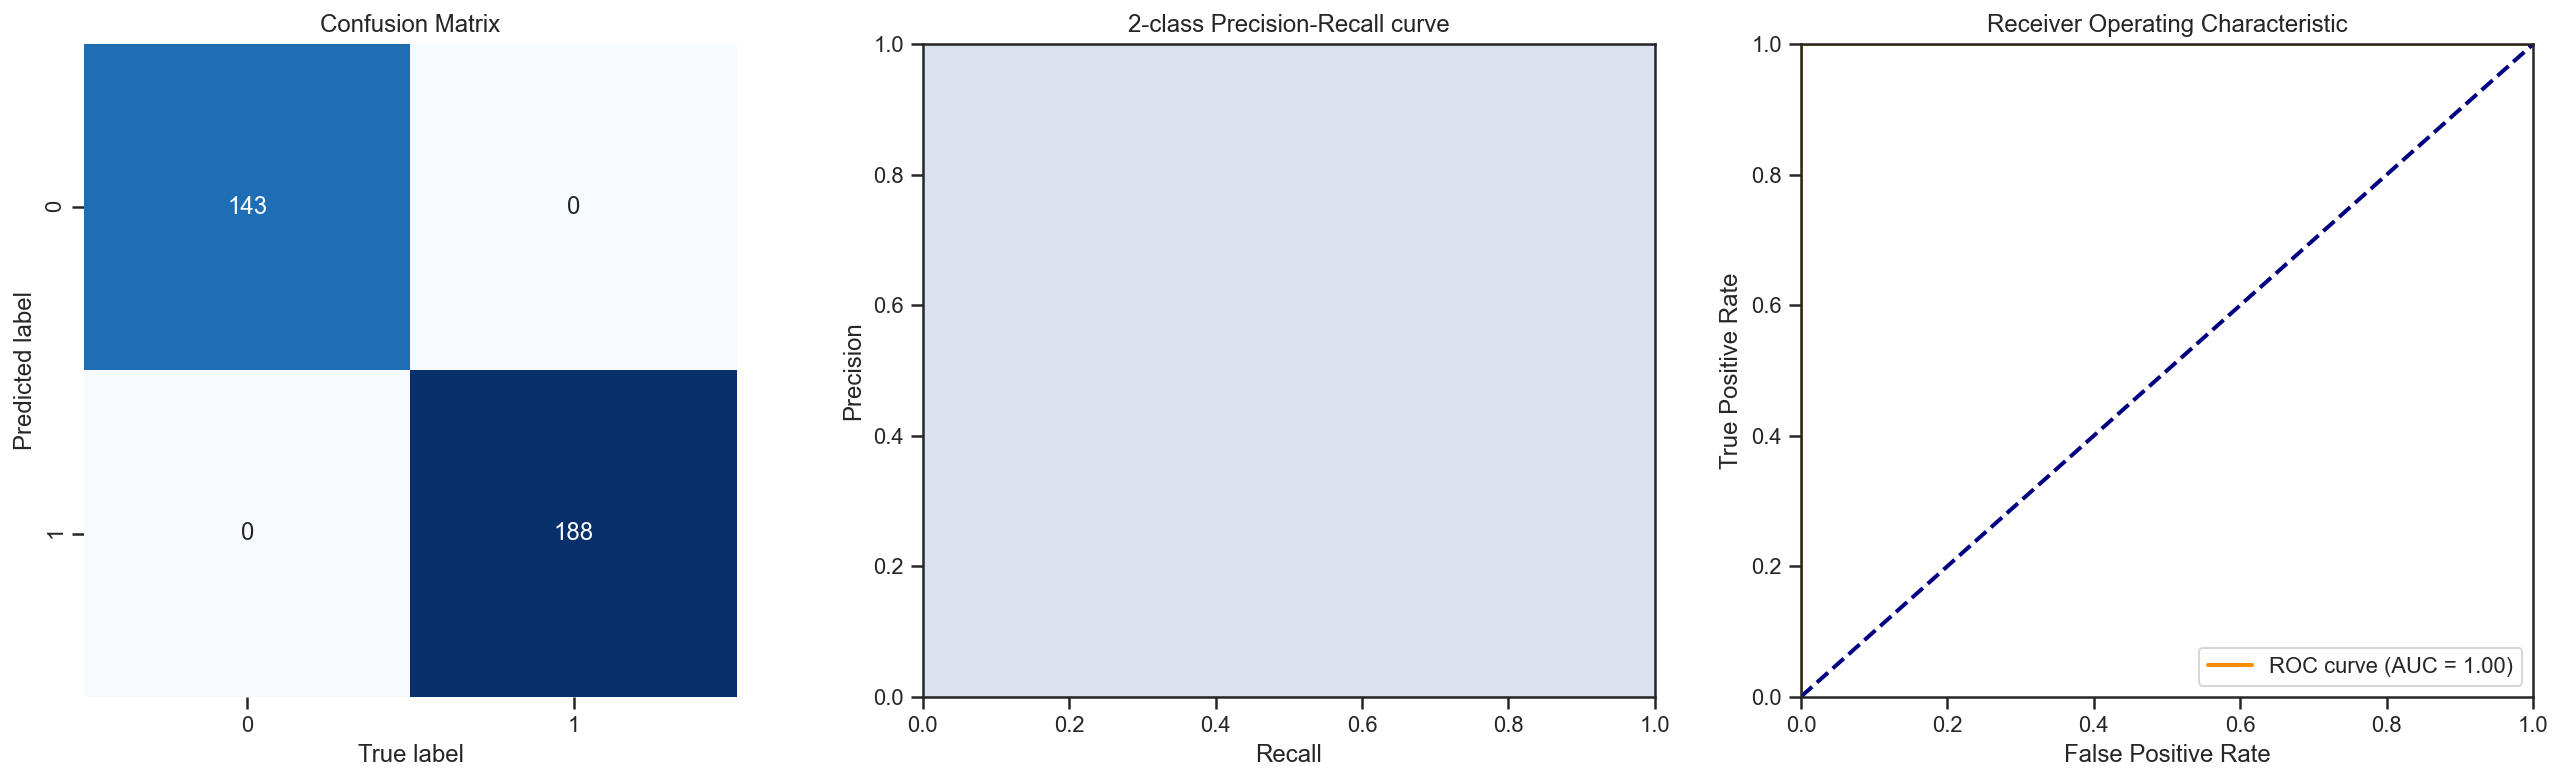

In [151]:
show_summary_report(y_test, y_test_pred, y_test_prob)

In [152]:
#Importing libraries for bagging method
## Import Libraries
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [153]:
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

In [154]:
#Applying Bagging model
kfold = KFold(n_splits = 10, random_state = 7)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9741


In [155]:
num_trees = 100
model1 = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = 7)
model1.fit(X_train, y_train)
results = cross_val_score(model1, X_train, y_train, cv = kfold)
print('Bagging, Cross-Validation mean: %.4f' % results.mean())

Bagging, Cross-Validation mean: 0.9795


In [156]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, 1])

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 0.9946 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9981 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9925 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9999                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


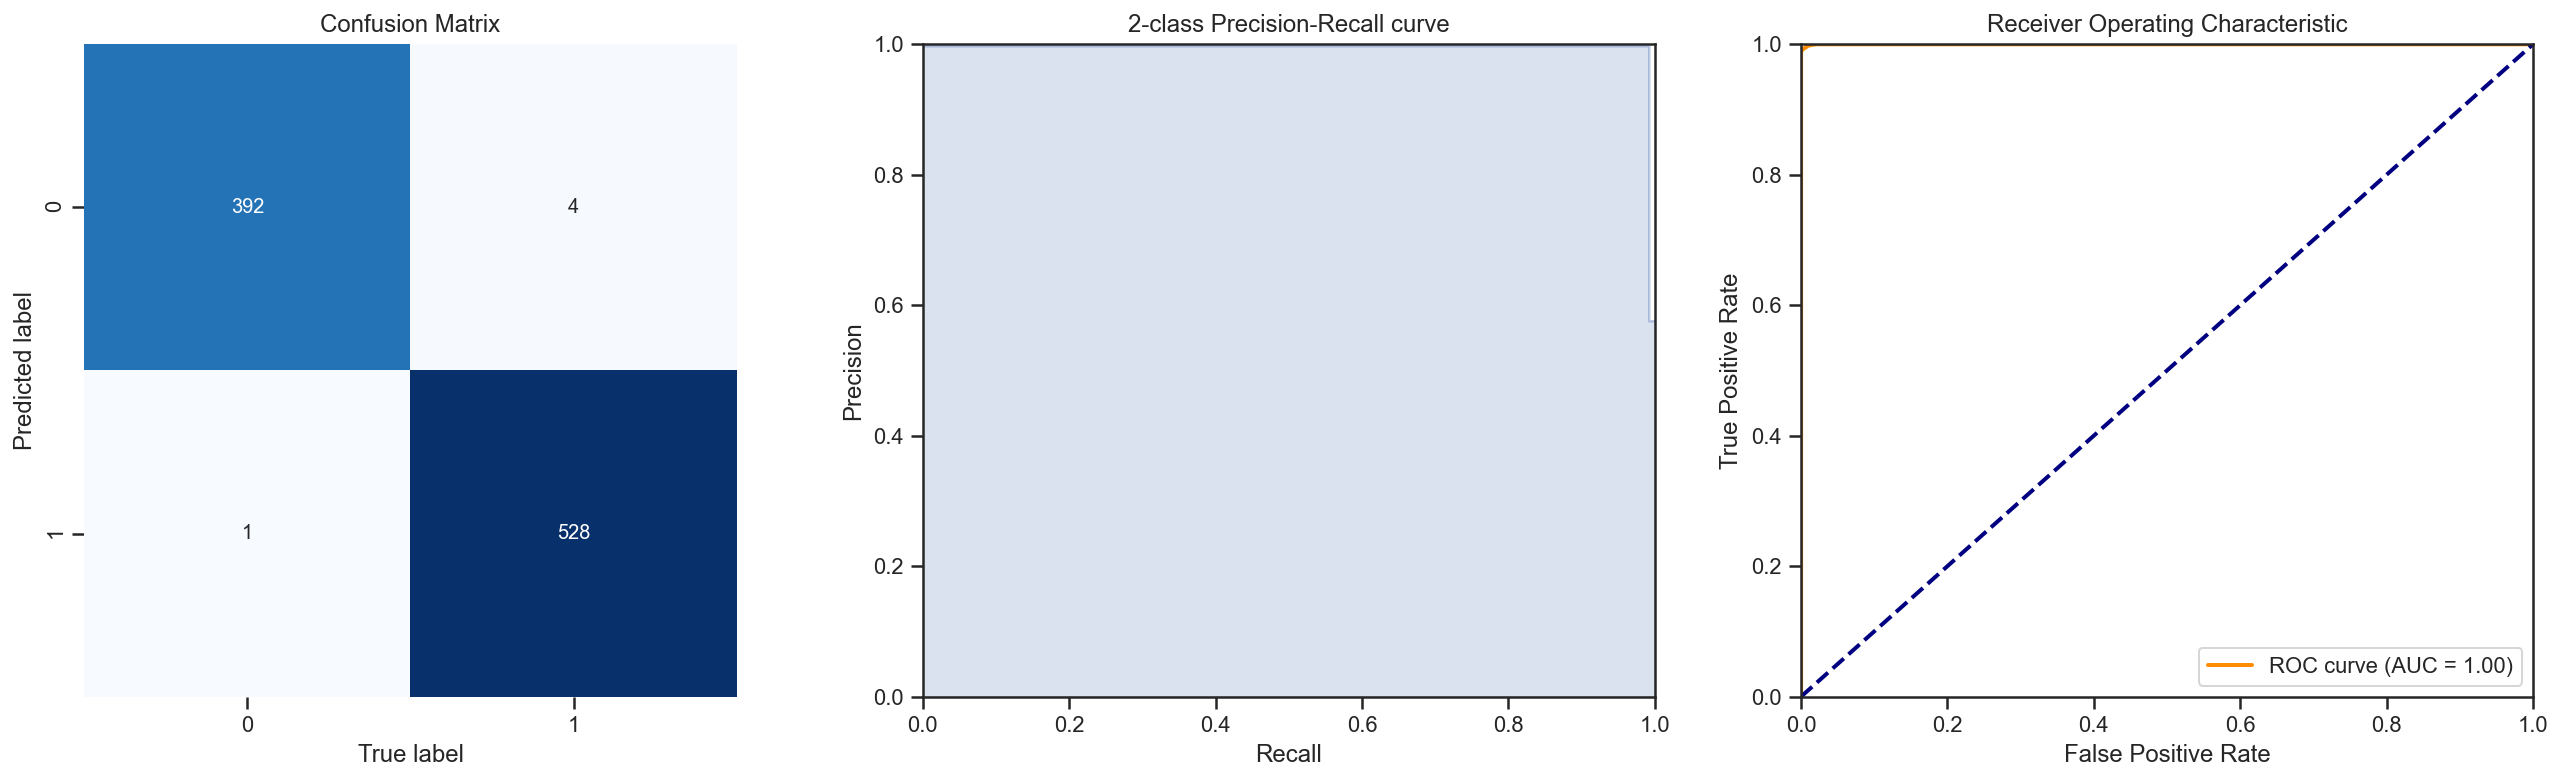


****************
* Bagging (DT) *
****************
Accuracy : 0.9946 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9944 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9962 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9999                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


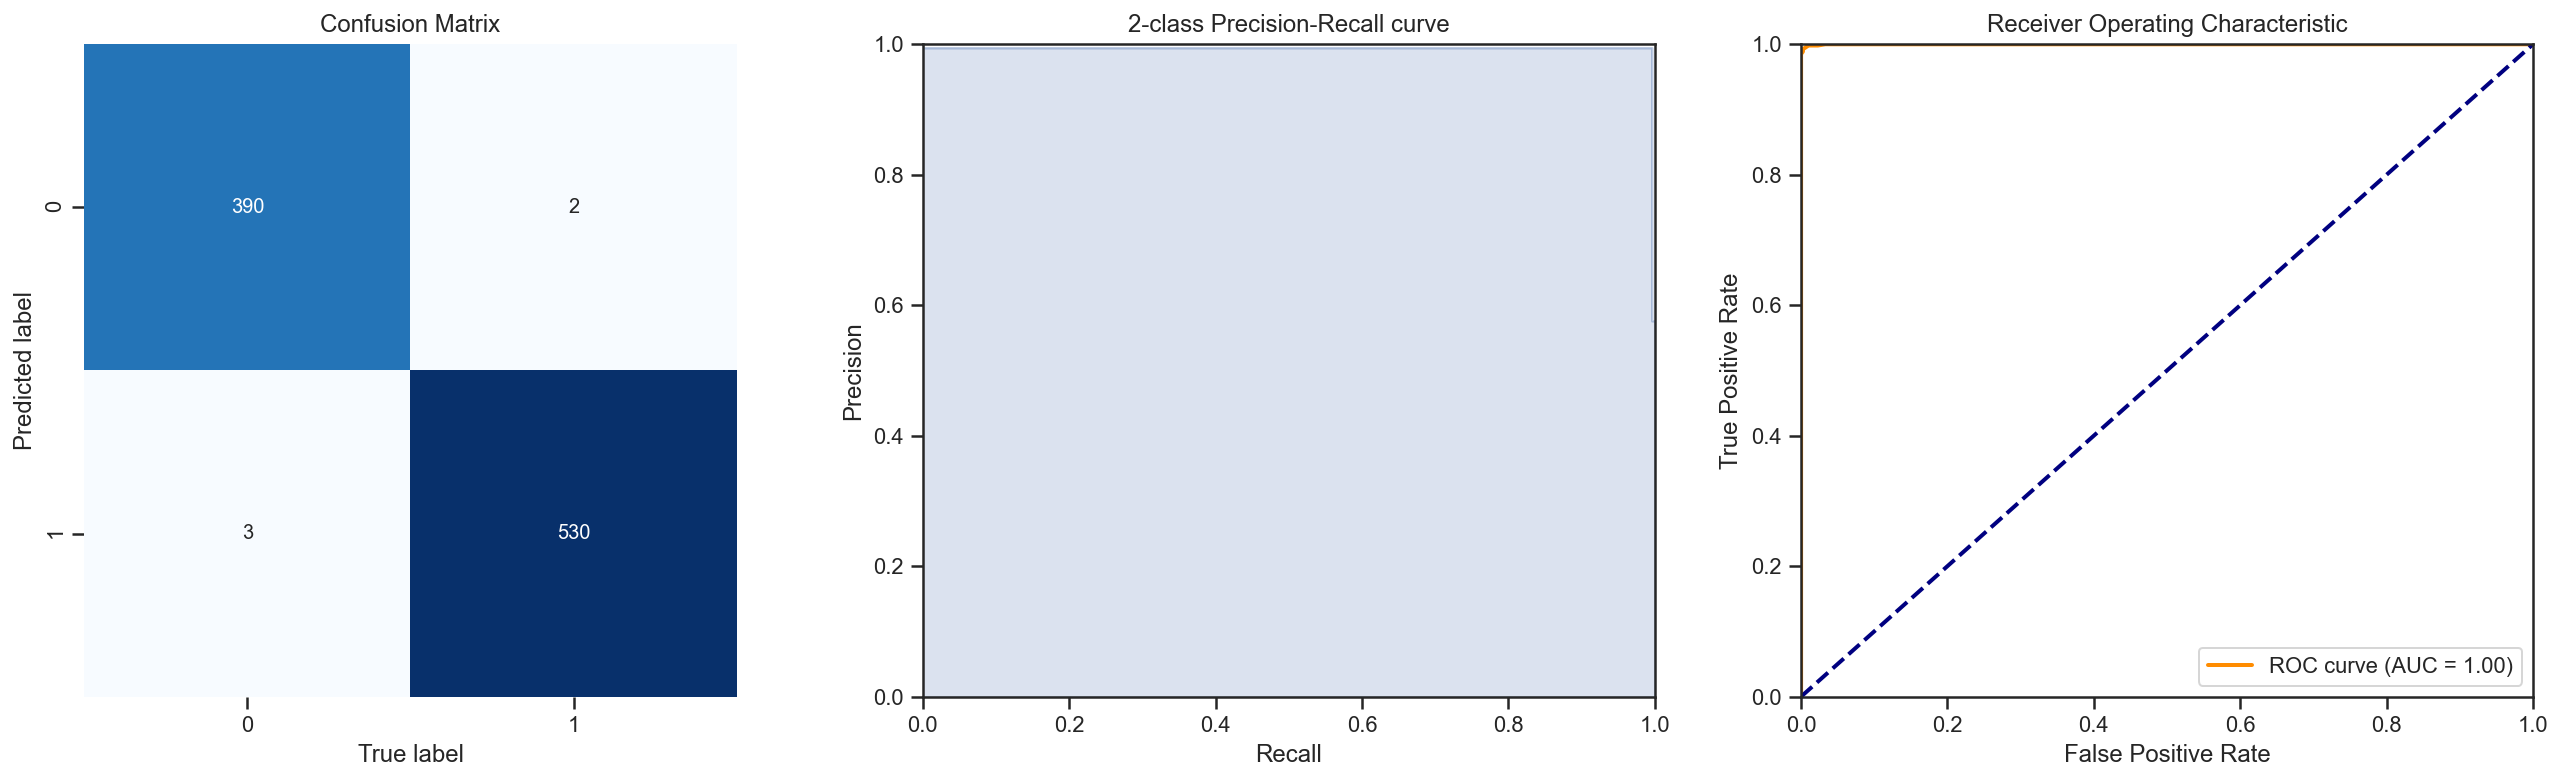

In [157]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([cart, model1]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    probabilities = m.predict_proba(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [158]:
# gbm.fit(xx_train, y_train)
predictions = model1.predict(X_test)
probabilities = model1.predict_proba(X_test)

Accuracy : 0.9698 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9655 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9825 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9878                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


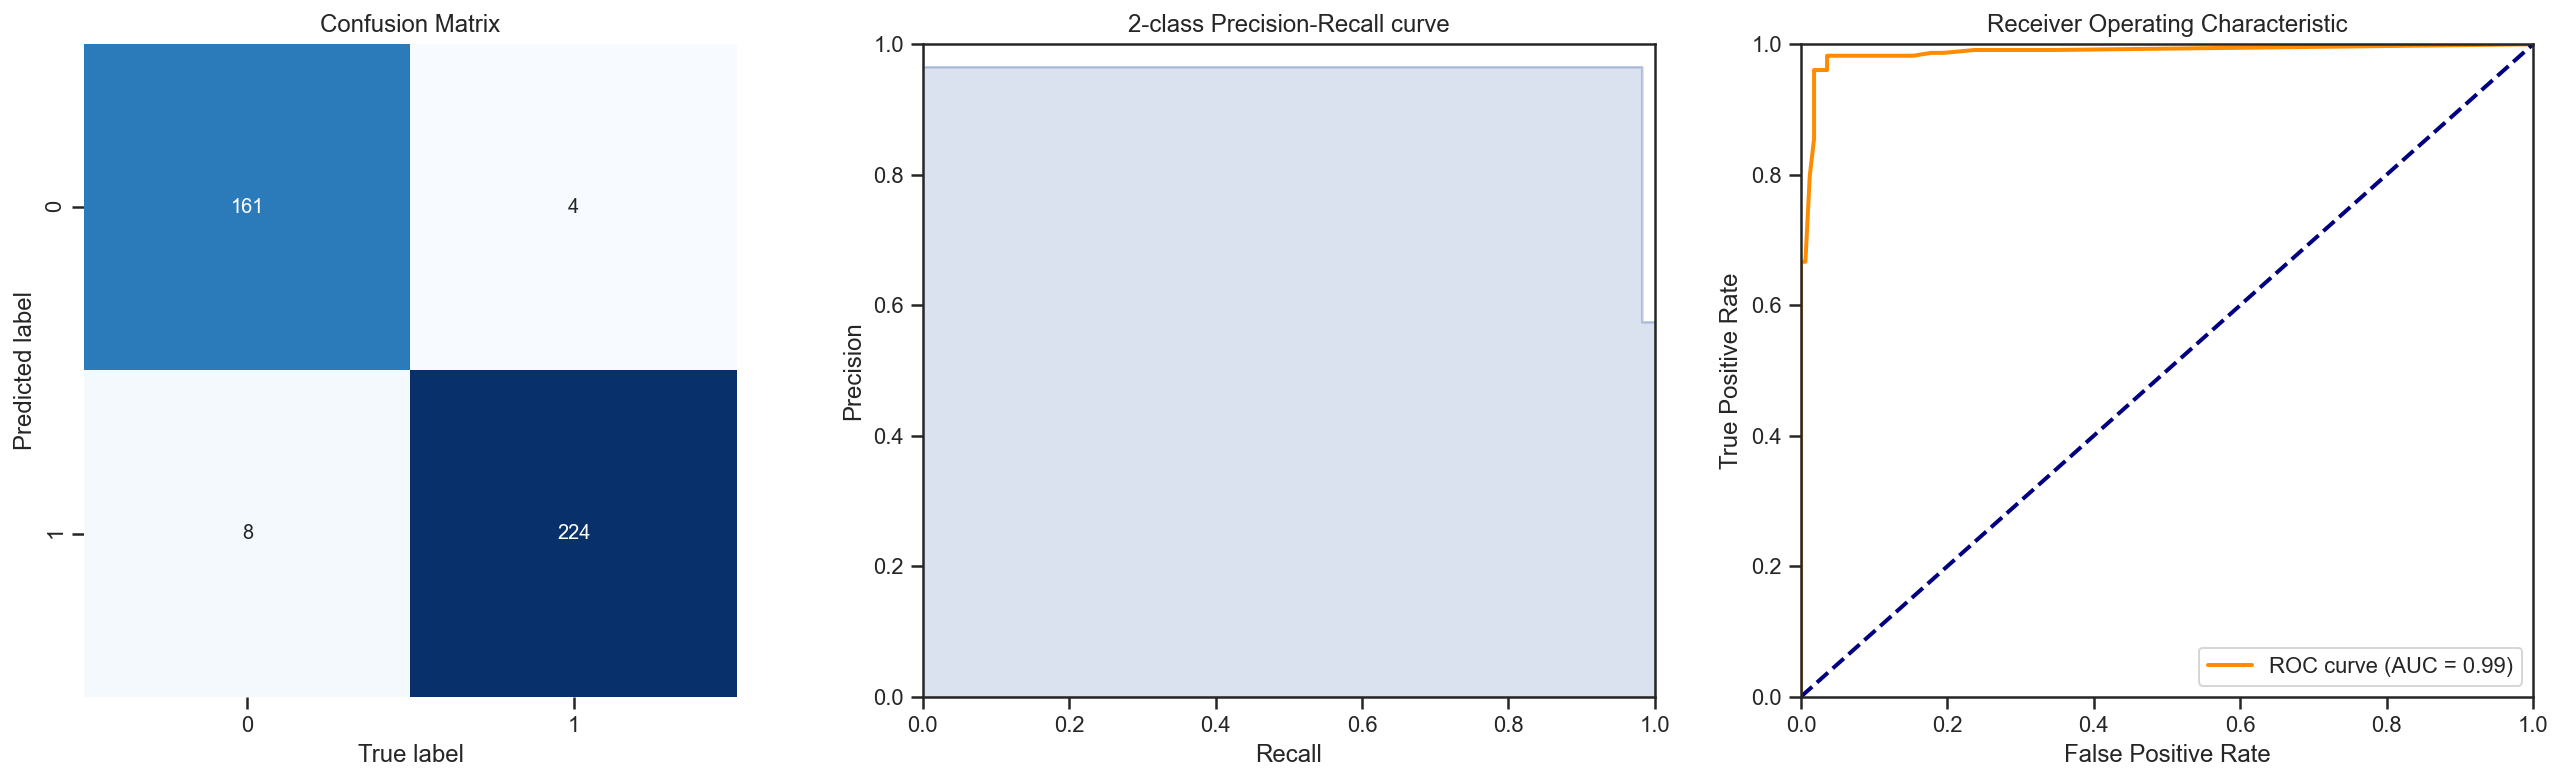

In [159]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions, probabilities)
# keep the results
results.loc[len(results)] = {
    'Model': 'Bagging (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [160]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.994595,0.998110,0.992481,0.999931
1,Bagging (DT),0.994595,0.994371,0.996241,0.999897
2,Bagging (with test),0.969773,0.965517,0.982456,0.987776


In [161]:
#Importing libraries for boosting method
import itertools

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import warnings
warnings.filterwarnings('ignore')

In [162]:
## Create training and testing subsets
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

In [163]:
kfold = KFold(n_splits = 10, random_state = 7)
cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)
results = cross_val_score(cart, X_train, y_train, cv = kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results.mean())

Decision Tree, Cross-Validation mean: 0.9741


In [164]:
seed = 7
num_trees = 70
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
model = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
model.fit(X_train, y_train)
results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold)
print('AdaBoost, Cross-Validation mean: %.4f' % results.mean())

AdaBoost, Cross-Validation mean: 0.5081


In [165]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 0.9946 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9981 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9925 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9950                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


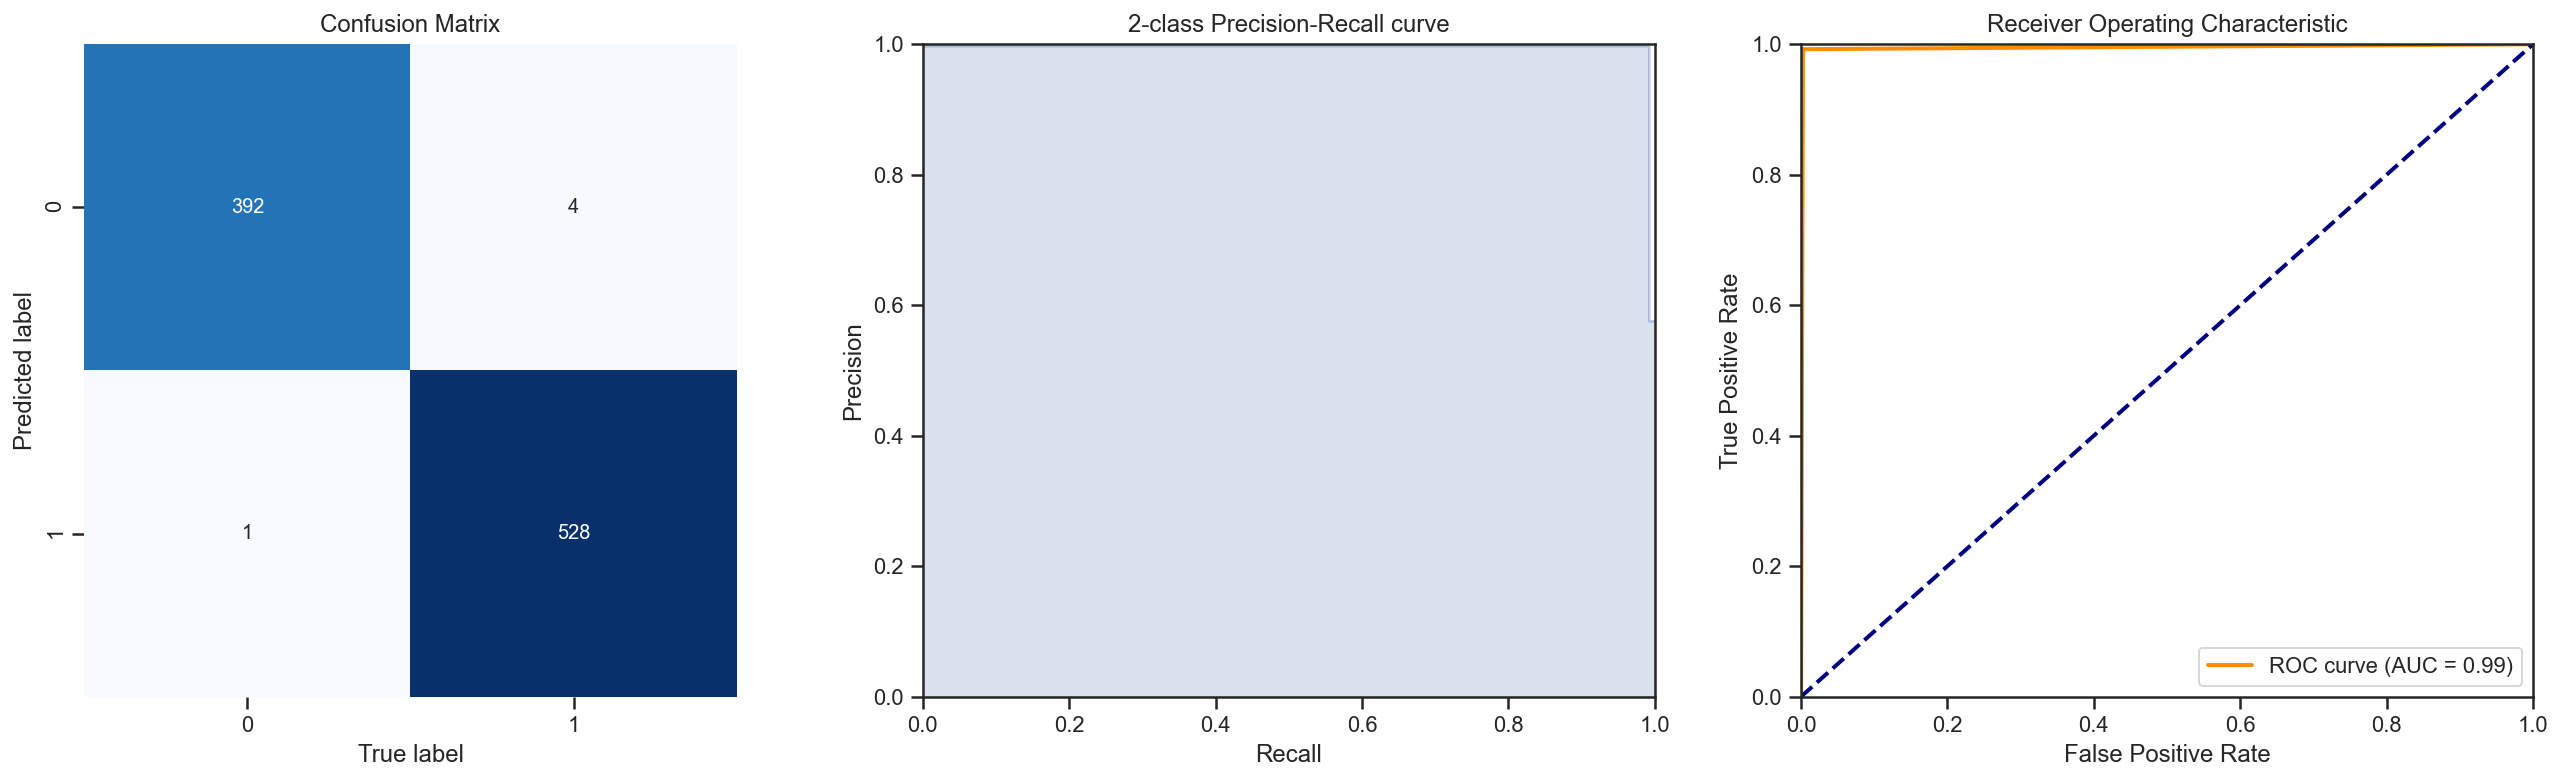


************
* AdaBoost *
************
Accuracy : 0.6162 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.6296 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.8083 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.5823                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


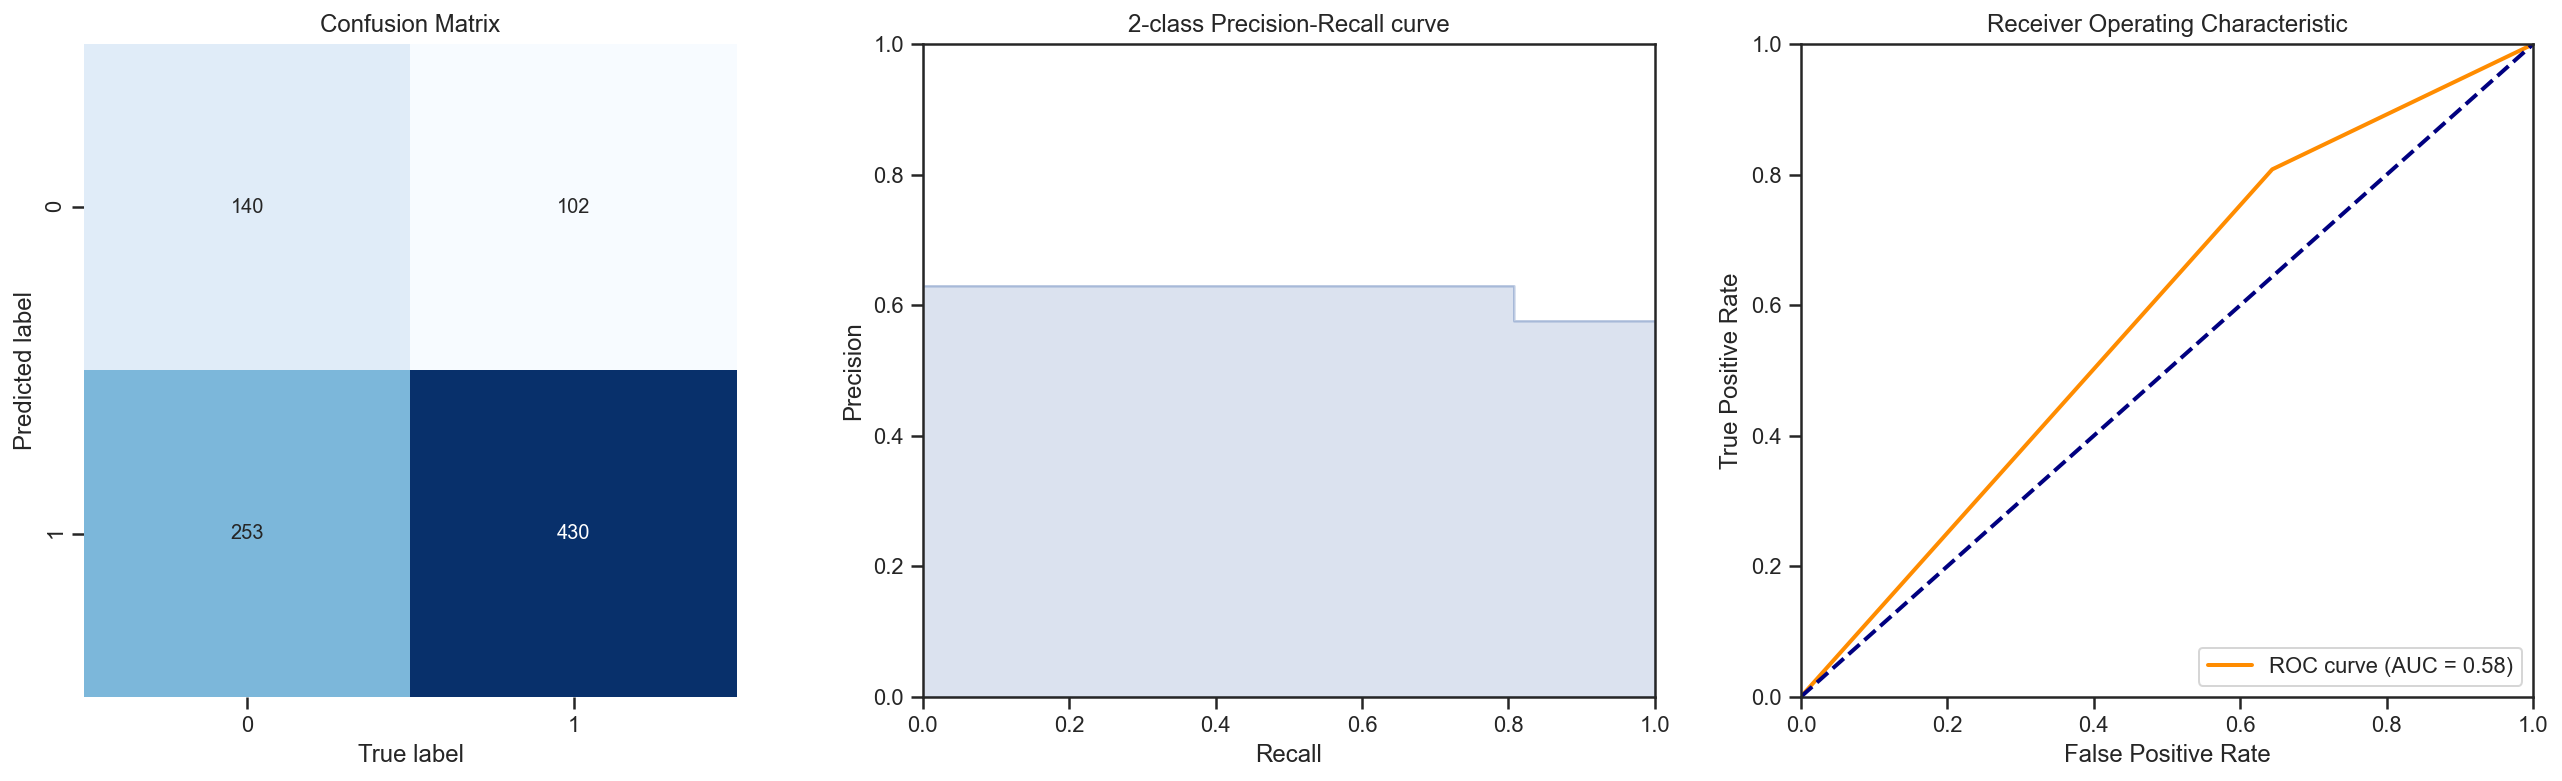

In [166]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'AdaBoost']
for i, m in enumerate([cart, model]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

In [167]:
# gbm.fit(xx_train, y_train)
predictions = model.predict(X_test)

Accuracy : 0.4710 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.5317 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.6623 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.4376                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


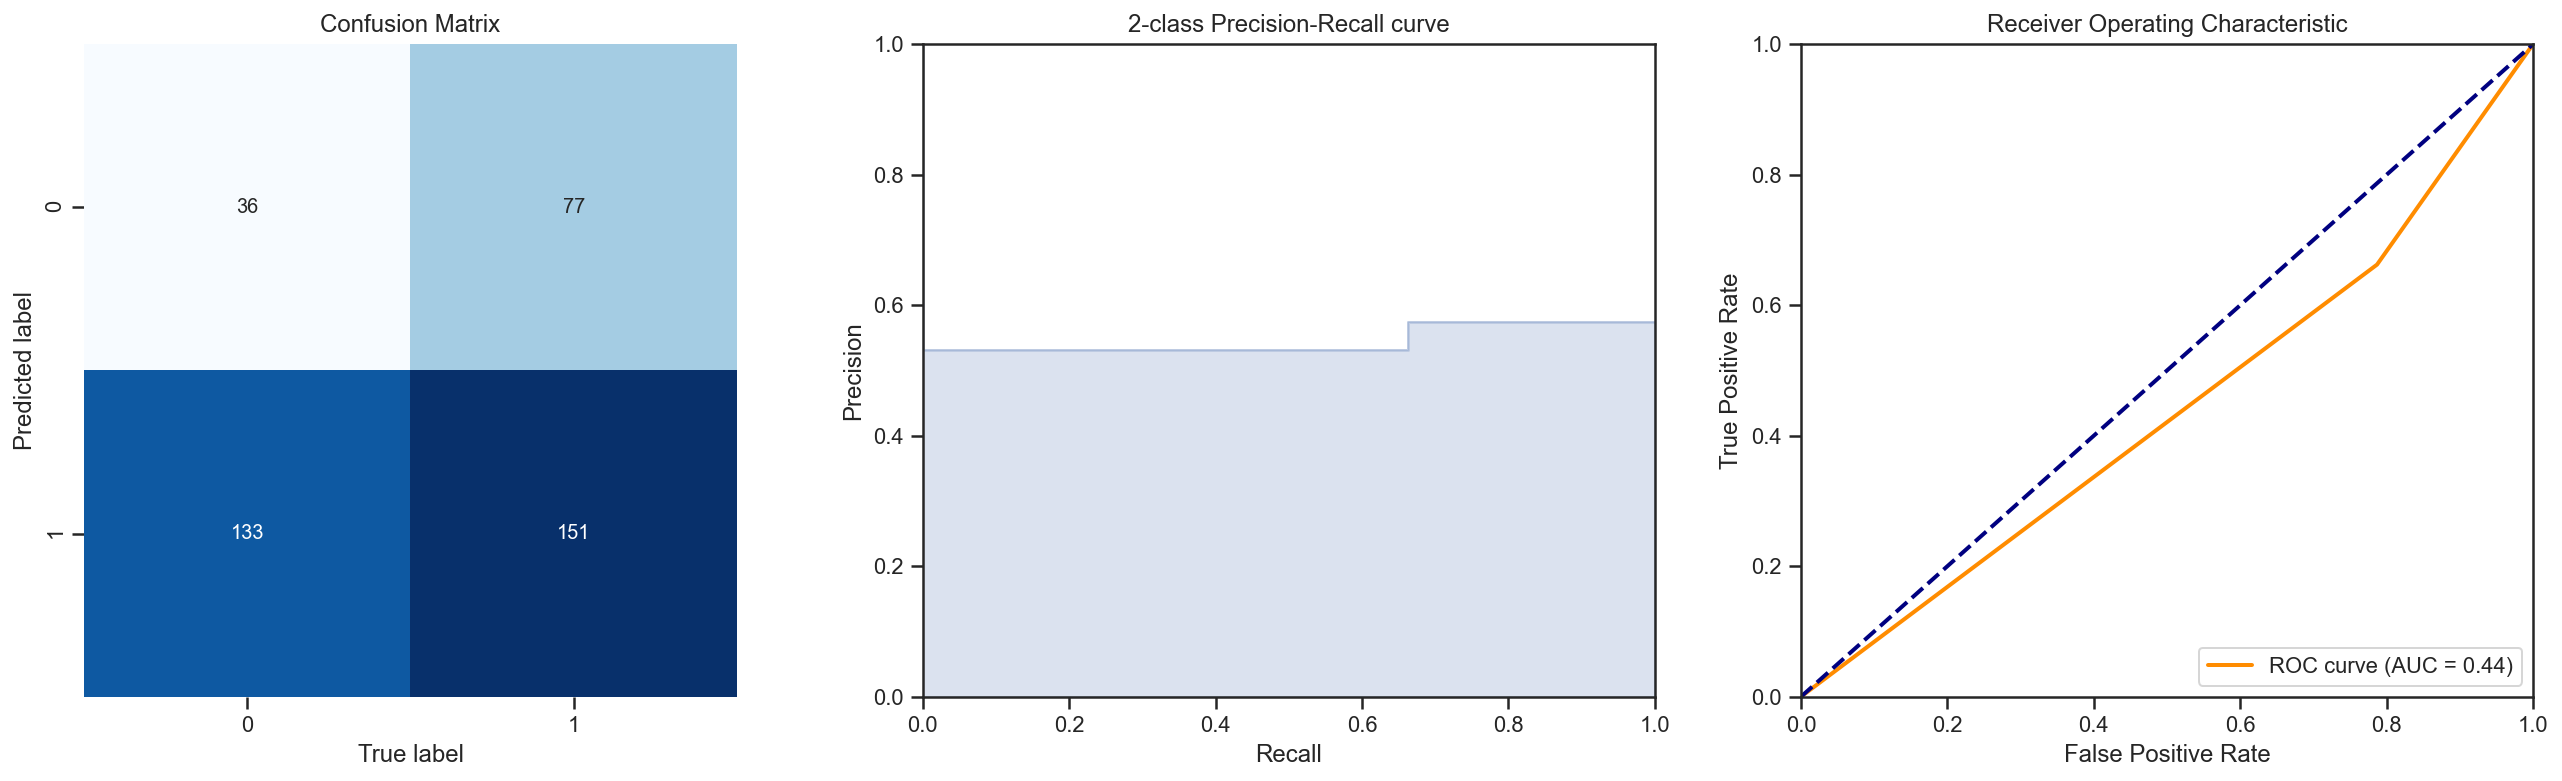

In [168]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, predictions)
# keep the results
results.loc[len(results)] = {
    'Model': 'AdaBoost (with test)', 
    'Accuracy': accuracy_, 
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [169]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,0.994595,0.998110,0.992481,0.994968
1,AdaBoost,0.616216,0.629575,0.808271,0.582252
2,AdaBoost (with test),0.471033,0.531690,0.662281,0.437649
